# 09/06: [Overview] 이미지자료분석 (1)

> fastai로 이미지분석: 데이터저장, 학습, 기존데이터를 잘맞추는지 확인, 오답분석, 진짜 잘 맞추는게 맞을까? 

## 강의영상 

> youtube: https://www.youtube.com/playlist?list=PLQqh36zP38-w4djJcMLe2Jgfuj5V14NPi

## Import

In [1]:
from fastai.vision.all import * 

## 데이터저장

In [2]:
path = untar_data(URLs.PETS)/'images'
# URLs.PETS: 스트링 -> 주소가 저장되어 있음.. -> 주소로 들어가보니 어떠한 압축파일이 자동으로 다운 받아짐, 이게 데이터 
# untar_data: (1) URLs.PETS에 저장된 주소로 찾아가서 (2) 압축을 풀어서 (3) 어떠한 폴더에 저장, 그 폴더의 위치는 path 에 저장 

In [3]:
path # 여기에 그림이 있다는 말이지?? 

Path('/root/.fastai/data/oxford-iiit-pet/images')

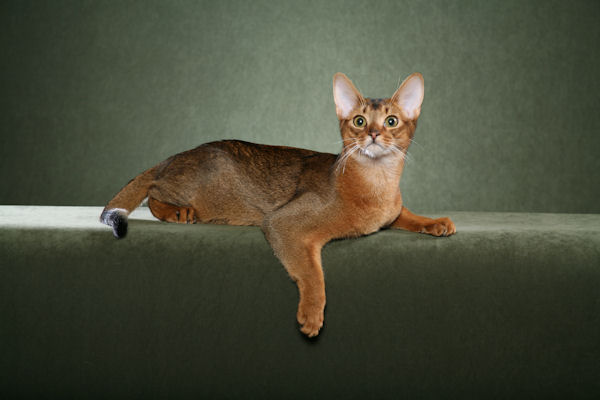

In [4]:
# 
# 탐색... 여러파일들이 있기는함.. 
# Abyssinian_1.jpg 를 보고싶다면? 
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

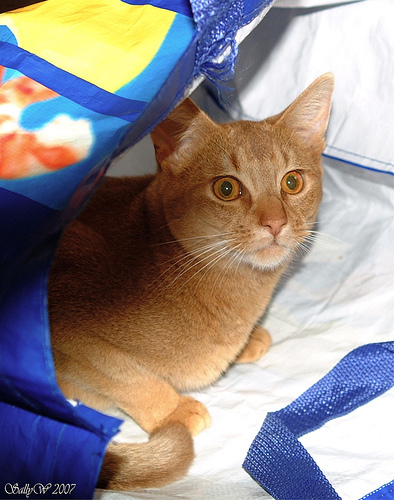

In [5]:
# 
# Abyssinian_100.jpg 를 보고싶다면? 
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg')

`-` 그림을 확인 할 수 있는건 좋은데 이렇게 확인하니까 조금 귀찮음.. 

In [6]:
_lst = ['/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg','/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg']

In [7]:
_lst[0]

'/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'

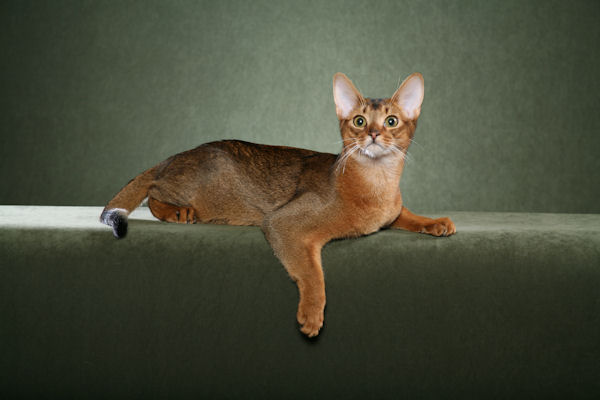

In [8]:
PILImage.create(_lst[0])

In [9]:
files= get_image_files(path)
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_26.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_2.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_192.jpg')...]

In [10]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_92.jpg')

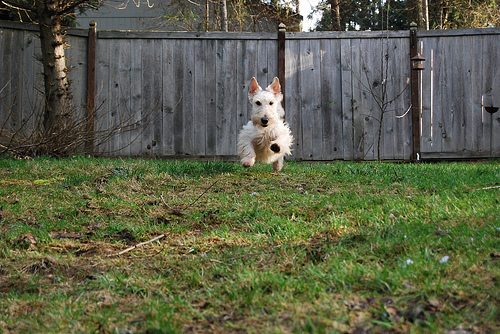

In [11]:
#PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/english_setter_59.jpg')
PILImage.create(files[0])

/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_120.jpg


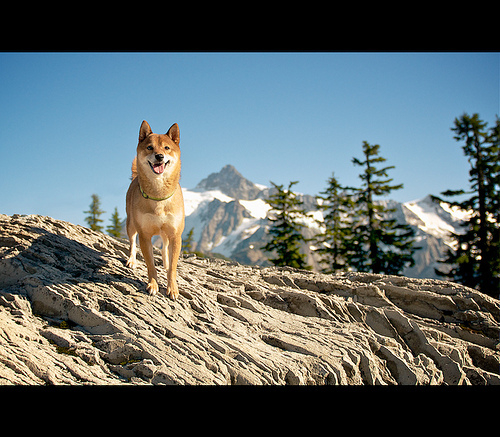

In [12]:
print(files[2])
PILImage.create(files[2])

/root/.fastai/data/oxford-iiit-pet/images/Persian_26.jpg


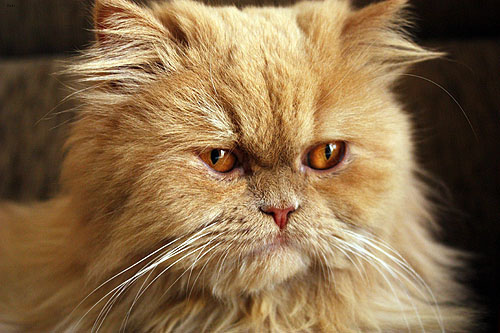

In [13]:
print(files[3])
PILImage.create(files[3])

/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_86.jpg


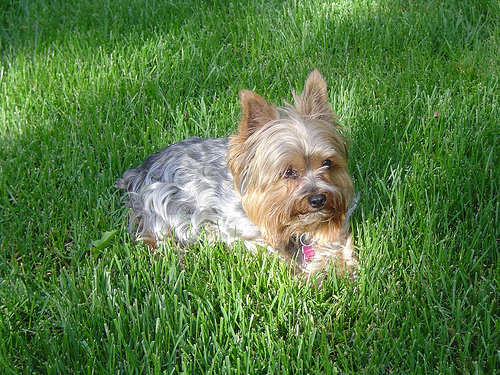

In [14]:
print(files[4])
PILImage.create(files[4])

/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_56.jpg


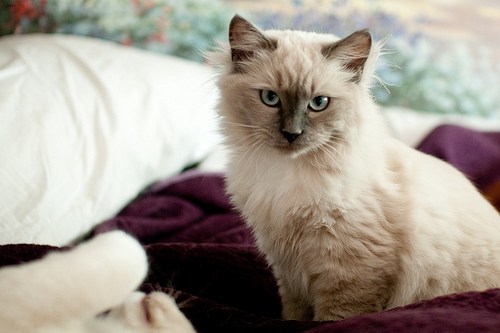

In [15]:
print(files[5])
PILImage.create(files[5])

/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_2.jpg


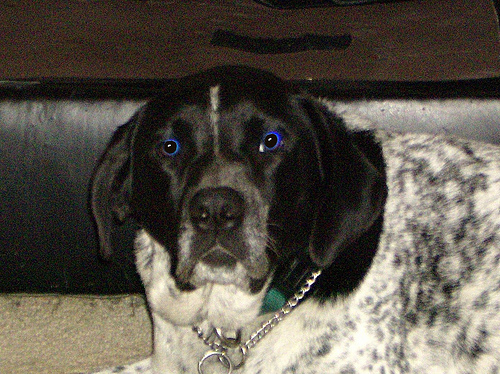

In [16]:
print(files[6])
PILImage.create(files[6])

/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg


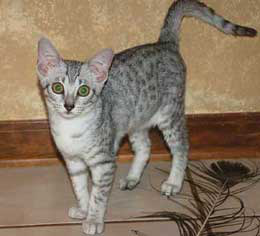

In [17]:
print(files[7])
PILImage.create(files[7])

/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_169.jpg


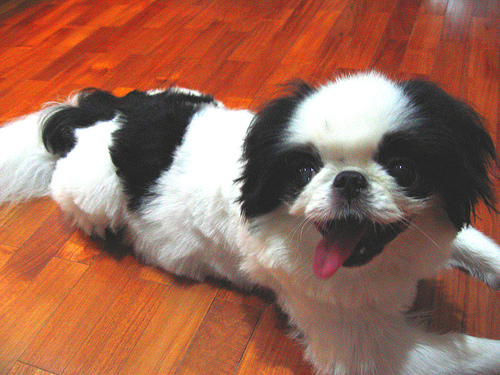

In [18]:
print(files[8])
PILImage.create(files[8])

In [19]:
# 
# 특1: 대문자이면 고양이, 소문자이면 강아지그림이다!! (천재적인 저장방식)
# 특2: 이미지크기가 서로 다르다..

In [20]:
def label_func(fname):
  if fname[0].isupper():
    return 'cat'
  else:
    return 'dog'

In [21]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))
# path 경로에서 
# files 에 해당하는 파일들을 불러와서 X를 만들고 
# item_tfms 에 정의된 방식으로 X를 변환하여 저장한다. 그리고 
# label_func: "파일이름" -> "라벨", 에 저장된 함수내용을 바탕으로 y를 만들어 저장한다. 
# 이 모든것이 저장된 자료는 변수 dls에 저장한다. 

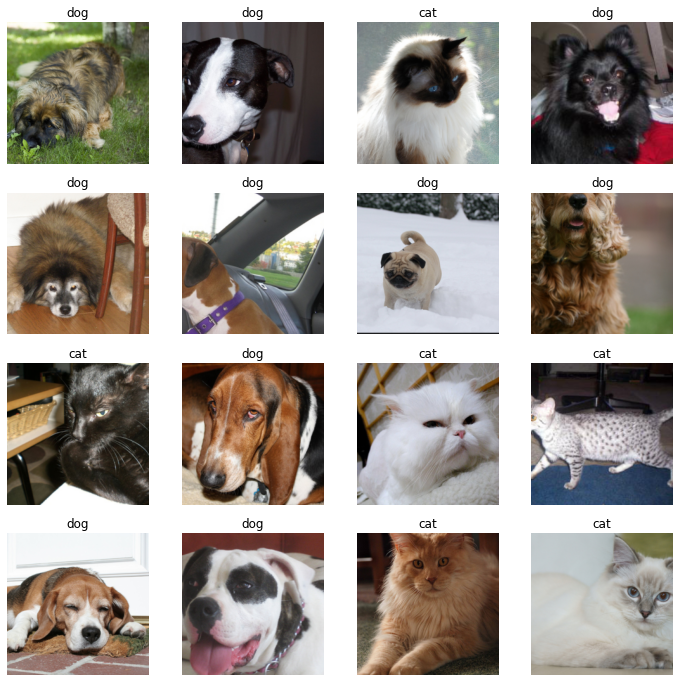

In [22]:
dls.show_batch(max_n=16)

## 학습

In [23]:
# 우리의 1차 목표: 이미지 -> 개/고양이 판단하는 모형을 채용하고, 그 모형에 데이터를 넣어서 학습하고, 그 모형의 결과를 판단하고 싶다. (즉 클래시파이어를 만든다는 소리)
# 우리의 2차 목표: 그 모형에 "새로운" 자료를 전달하여 이미지를 분류할 것이다. (즉 클래시파이어를 쓴다는 소리)

# cnn_learner 라는 함수를 이용해서 1차목표와 2차목표를 달성할 "썸띵(Object)"을 만들것임. 
## 오브젝트란? 정보와 함수를 동시에 가지는 어떠한 집합체 
# - 오브젝트.명사이름: 이것 통채로 하나의 변수처럼 쓸 수 있음. 
# - 오브젝트.동사이름: 이것 통채로 하나의 함수처럼 쓸 수 있음. (이때 함수의 첫번째 입력은 명시하지 않아도 오브젝트 그 자체가 된다)

## clafr에 필요한 명사(=정보) <-- 우리가 넣어줘야하는 것들이 대부분
# (1) 모델정보: 클래시파이어로 누구를 뽑을것인가 (유명한 모델이 무엇인가? 잘 맞추는 모델이 무엇인가)
# (2) 데이터: 데이터를 줘야함 
# (3) 평가기준표: 채점을 할 지표 
## clafr에 필요한 동사(=함수) <-- 이미 구현이 되어있음.. 
# (1) 학습 
# (2) 결과를 판단
# (3) 예측 

clsfr = cnn_learner(dls,resnet34,metrics=error_rate)
# clsfr 라는 오브젝트를 만들건데.. 
# 그 오브젝트의 재료로 dls (데이터), resnet34 (데이터를 분석할 모형이름), metrics (모형의 성능을 평가할 기준) 를 넣음. 

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [24]:
clsfr.fine_tune(1) # 학습을 하는 함수

## 기존 데이터를 잘 맞추는지 확인

In [25]:
files[0] # 강아지 

Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_92.jpg')

In [26]:
clsfr.predict(files[0])

('dog', TensorBase(1), TensorBase([6.8846e-07, 1.0000e+00]))

In [27]:
files[7] # 고양이

Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg')

In [28]:
clsfr.predict(files[7])

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3773e-08]))

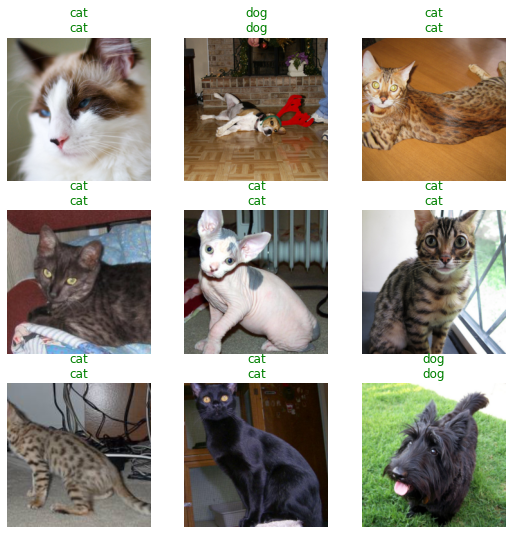

In [32]:
clsfr.show_results()

## 오답분석

In [29]:
interpreter = Interpretation.from_learner(clsfr) # 오답을 분석하는 오브젝트를 만듬.. 재료는 클래시파이어! 

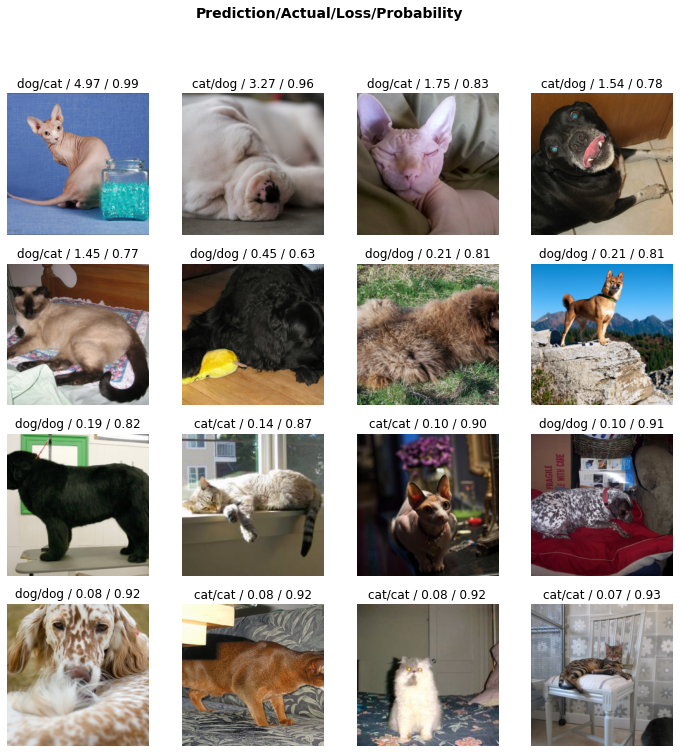

In [30]:
interpreter.plot_top_losses(16) # 오답을 분석하는 오브젝트는 가장 오류가 높은 이미지를 정렬하여 보여주는 기능이 있음..

## 진짜 잘되는게 맞는건가? 

In [33]:
clsfr.predict(files[7])

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3773e-08]))

In [34]:
clsfr.predict('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg')

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3773e-08]))

In [36]:
clsfr.predict(PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3773e-08]))

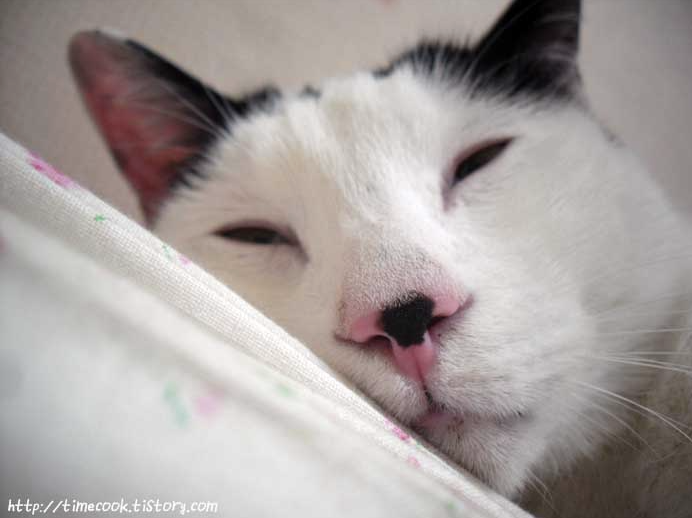

In [39]:
PILImage.create('2022-09-06-cat1.png')

In [40]:
clsfr.predict(PILImage.create('2022-09-06-cat1.png'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.5662e-10]))

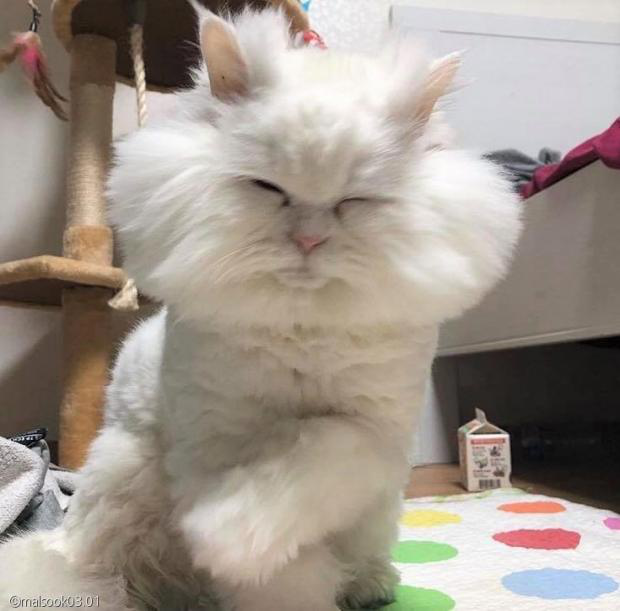

In [41]:
PILImage.create('2022-09-06-cat2.jpeg')

In [42]:
clsfr.predict(PILImage.create('2022-09-06-cat2.jpeg'))

('cat', TensorBase(0), TensorBase([0.9809, 0.0191]))

In [44]:
clsfr.predict(PILImage.create('2022-09-06-hani01.jpeg'))

('dog', TensorBase(1), TensorBase([3.2573e-10, 1.0000e+00]))

In [46]:
clsfr.predict(PILImage.create('2022-09-06-hani02.jpeg'))

('dog', TensorBase(1), TensorBase([7.0723e-07, 1.0000e+00]))

In [48]:
clsfr.predict(PILImage.create('2022-09-06-hani03.jpg'))

('dog', TensorBase(1), TensorBase([0.1814, 0.8186]))

## 숙제 

`-` 인터넷에 존재하는 개 혹은 고양이 이미지를 임의로 하나 불러온뒤 clsfr에 넣어보고 결과를 관찰하라. 관찰결과를 스크린샷하여 제출하라. 
- 숙제를 위한 예시코드 
```python
# https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg <-- 인터넷의 이미지 주소
img=PILImage.create(requests.get('https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg').content)
clsfr.predict(img)
```

`-` 숙제 못하겠으면 카톡으로 물어보세요! 답 알려드립니다. 

`-` 숙제는 간단하게 편한 형식으로 제출하세요. (저는 스크린샷 선호해요..) pdf나 hwp로 만드실 필요 없습니다. 